## Analysis of Robinhood Portfolio (robin_$tocks)

Project by: Pete Aguirre II

In this project, I will do a retuern:risk analysis on my current Robinhood stock portfolio with the help of multiple 
tools using:
- Python 3
- Jupyter Lab/Notebook
- Beautiful Soup
- Markowitz Efficent Frontier

## TO DO LIST:
- Convert my_portfolio['Percentage'] to decimals
- Create a daily, weekly, quarterly, yearly portfolio performance
- Learn how to create beatiful graphs
- Create interactive dashboards 
- Fix bugs on diversifiable and non-diversifiable ortfolio risk analysis 
- Learn Monte Carlo Simulations

In [1]:
# Installing libraries 
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install robin_stocks

# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import robin_stocks as r 
import pyotp

from pandas_datareader import data as wb

# Magic
%matplotlib inline

## 1.) Data Collection (updated)
Notes: Log in with Robinhood and portfolio will be gathered automatically

In [ ]:
# Robinhood Log In 
email = input("Enter email: ")
password = input("Enter password: ")

totp = pyotp.TOTP("My2factorAppHere").now()
log_in = r.login(email, password, expiresIn=500, by_sms=True, mfa_code=totp)

# Get stocks value
stonks = r.build_holdings()

# Logout 
r.logout()

In [266]:
# Company tickers
# Since the company tickers are the keys, and the other variables are values, 
# create a dataframe for symbols first.
symbols_df = []
for k in  stonks.keys():
    symbols_df.append(k)
symbols_df = np.array(symbols_df)
symbols_df = pd.DataFrame(symbols_df, columns=['Symbol'])
symbols_df

,Symbol
0,AAPL
1,BRK.B
2,BABA
3,JD
4,XOM
5,LUV
6,DAL
7,PFE
8,ARKW
9,AGNC


In [267]:
# Other headers 
# Create a dataframe for the other headers (which are values to the symbol keys).
# Drop some variables: percent_change, equity_change, type, and id 
# Rename the variables to something nicer looking
variables_df = pd.DataFrame.from_dict(stonks.values())
variables_df = variables_df.drop(['percent_change', 'equity_change', 'type', 'id', 'percentage'], axis=1)
variables_df = variables_df.rename(columns={'price':'Price', 'quantity':'Quantity', 'average_buy_price':'Average Price', 'equity':'Equity', 'name':'Name', 'pe_ratio':'P/E'})
variables_df

,Average Price,Equity,Name,P/E,Price,Quantity
0,426.6150,5319.00,Apple,33.780000,443.250000,12.00000000
1,208.9300,1261.68,Berkshire Hathaway,52.448700,210.280000,6.00000000
2,246.0856,2464.20,Alibaba,30.912800,246.420000,10.00000000
3,63.0859,1021.11,JD.com,107.000000,60.065000,17.00000000
4,42.4100,882.50,Exxon Mobil,25.867900,44.125000,20.00000000
5,31.7173,519.60,Southwest Airlines,82.847900,34.640000,15.00000000
6,25.0280,428.10,Delta Air Lines,None,28.540000,15.00000000
7,36.9630,384.50,Pfizer,15.290100,38.450000,10.00000000
8,101.1297,1073.01,ARK Next Generation Internet,-170.566760,97.546700,11.00000000
9,13.7100,13.87,AGNC Investment,None,13.866300,1.00000000


## 2.) Data Cleaning

In [268]:
# Concatinate both DataFrames 
my_portfolio = pd.concat([symbols_df, variables_df], axis=1)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity
0,AAPL,426.6150,5319.00,Apple,33.780000,443.250000,12.00000000
1,BRK.B,208.9300,1261.68,Berkshire Hathaway,52.448700,210.280000,6.00000000
2,BABA,246.0856,2464.20,Alibaba,30.912800,246.420000,10.00000000
3,JD,63.0859,1021.11,JD.com,107.000000,60.065000,17.00000000
4,XOM,42.4100,882.50,Exxon Mobil,25.867900,44.125000,20.00000000
5,LUV,31.7173,519.60,Southwest Airlines,82.847900,34.640000,15.00000000
6,DAL,25.0280,428.10,Delta Air Lines,None,28.540000,15.00000000
7,PFE,36.9630,384.50,Pfizer,15.290100,38.450000,10.00000000
8,ARKW,101.1297,1073.01,ARK Next Generation Internet,-170.566760,97.546700,11.00000000
9,AGNC,13.7100,13.87,AGNC Investment,None,13.866300,1.00000000


In [269]:
# Check variable types
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
Symbol           10 non-null object
Average Price    10 non-null object
Equity           10 non-null object
Name             10 non-null object
P/E              8 non-null object
Price            10 non-null object
Quantity         10 non-null object
dtypes: object(7)
memory usage: 640.0+ bytes


In [270]:
# Change some values to floats and round them to 2 decimal numbers
my_portfolio['Price'] = my_portfolio['Price'].astype(float)
my_portfolio['Quantity'] = my_portfolio['Quantity'].astype(float)
my_portfolio['Average Price'] = round(my_portfolio['Average Price'].astype(float), 2)
my_portfolio['Equity'] = round(my_portfolio['Equity'].astype(float), 2)
my_portfolio['P/E'] = my_portfolio['P/E'].astype(float)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity
0,AAPL,426.62,5319.00,Apple,33.78000,443.2500,12.0
1,BRK.B,208.93,1261.68,Berkshire Hathaway,52.44870,210.2800,6.0
2,BABA,246.09,2464.20,Alibaba,30.91280,246.4200,10.0
3,JD,63.09,1021.11,JD.com,107.00000,60.0650,17.0
4,XOM,42.41,882.50,Exxon Mobil,25.86790,44.1250,20.0
5,LUV,31.72,519.60,Southwest Airlines,82.84790,34.6400,15.0
6,DAL,25.03,428.10,Delta Air Lines,NaN,28.5400,15.0
7,PFE,36.96,384.50,Pfizer,15.29010,38.4500,10.0
8,ARKW,101.13,1073.01,ARK Next Generation Internet,-170.56676,97.5467,11.0
9,AGNC,13.71,13.87,AGNC Investment,NaN,13.8663,1.0


In [271]:
# Check once more
# Note: at this point, numbers should be floats
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
Symbol           10 non-null object
Average Price    10 non-null float64
Equity           10 non-null float64
Name             10 non-null object
P/E              8 non-null float64
Price            10 non-null float64
Quantity         10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


In [272]:
my_portfolio = my_portfolio[["Name","Symbol","Price","Quantity","Average Price","Equity","P/E"]]
# my_portfolio

In [273]:
# Convert any '.' to '-' in symbols
my_portfolio['Symbol'] = my_portfolio['Symbol'].str.replace(".", "-")

In [274]:
# Confirm that '.' has been replaced by '-' on symbol
my_portfolio

,Name,Symbol,Price,Quantity,Average Price,Equity,P/E
0,Apple,AAPL,443.2500,12.0,426.62,5319.00,33.78000
1,Berkshire Hathaway,BRK-B,210.2800,6.0,208.93,1261.68,52.44870
2,Alibaba,BABA,246.4200,10.0,246.09,2464.20,30.91280
3,JD.com,JD,60.0650,17.0,63.09,1021.11,107.00000
4,Exxon Mobil,XOM,44.1250,20.0,42.41,882.50,25.86790
5,Southwest Airlines,LUV,34.6400,15.0,31.72,519.60,82.84790
6,Delta Air Lines,DAL,28.5400,15.0,25.03,428.10,NaN
7,Pfizer,PFE,38.4500,10.0,36.96,384.50,15.29010
8,ARK Next Generation Internet,ARKW,97.5467,11.0,101.13,1073.01,-170.56676
9,AGNC Investment,AGNC,13.8663,1.0,13.71,13.87,NaN


In [275]:
# Create weights for each company
# capital = sigma(quantity * average price)
# weights = (quantity * average price)/capital

capital = np.sum(my_portfolio['Quantity']*my_portfolio['Average Price'])
weights = []

for w in range(len(my_portfolio)):
    weights.append(round(((my_portfolio['Quantity'][w] * my_portfolio['Average Price'][w])/capital), 2))

weights_df = np.array(weights)
weights_df = pd.DataFrame({'Weights':weights})



In [276]:
# Ensure that these are the only variables included
my_portfolio = pd.concat([my_portfolio, weights_df], axis=1)
my_portfolio

,Name,Symbol,Price,Quantity,Average Price,Equity,P/E,Weights
0,Apple,AAPL,443.2500,12.0,426.62,5319.00,33.78000,0.39
1,Berkshire Hathaway,BRK-B,210.2800,6.0,208.93,1261.68,52.44870,0.10
2,Alibaba,BABA,246.4200,10.0,246.09,2464.20,30.91280,0.19
3,JD.com,JD,60.0650,17.0,63.09,1021.11,107.00000,0.08
4,Exxon Mobil,XOM,44.1250,20.0,42.41,882.50,25.86790,0.06
5,Southwest Airlines,LUV,34.6400,15.0,31.72,519.60,82.84790,0.04
6,Delta Air Lines,DAL,28.5400,15.0,25.03,428.10,NaN,0.03
7,Pfizer,PFE,38.4500,10.0,36.96,384.50,15.29010,0.03
8,ARK Next Generation Internet,ARKW,97.5467,11.0,101.13,1073.01,-170.56676,0.08
9,AGNC Investment,AGNC,13.8663,1.0,13.71,13.87,NaN,0.00


## 3.) Data Collection of Historical Prices

In [277]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = my_portfolio['Symbol']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [278]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1476 entries, 2014-09-30 to 2020-08-10
Data columns (total 10 columns):
AAPL     1476 non-null float64
BRK-B    1476 non-null float64
BABA     1476 non-null float64
JD       1476 non-null float64
XOM      1476 non-null float64
LUV      1476 non-null float64
DAL      1476 non-null float64
PFE      1476 non-null float64
ARKW     1476 non-null float64
AGNC     1476 non-null float64
dtypes: float64(10)
memory usage: 126.8 KB


In [279]:
historical_data.head()

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,ARKW,AGNC
Date,,,,,,,,,,
2014-09-30,91.539680,138.139999,88.849998,25.820000,74.439339,32.008099,32.469711,23.765129,16.921232,10.747392
2014-10-01,90.113167,136.619995,86.099998,25.020000,73.497459,30.851748,31.346985,23.427576,16.549625,10.929461
2014-10-02,90.767372,137.639999,87.059998,25.690001,73.845734,30.766447,31.688282,23.355246,16.447199,10.848543
2014-10-03,90.512955,139.500000,88.099998,25.980000,74.336433,31.685839,33.188271,23.483837,17.048204,10.853606
2014-10-06,90.512955,139.160004,88.309998,25.959999,74.811340,31.316191,32.433784,23.443655,16.902611,10.980041


In [280]:
historical_data.tail()

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,ARKW,AGNC
Date,,,,,,,,,,
2020-08-04,437.870514,200.240005,262.200012,64.570000,43.470001,31.400000,25.670000,38.389999,101.730003,13.560
2020-08-05,439.457642,203.619995,264.910004,65.519997,43.849998,32.720001,26.469999,38.450001,103.440002,13.740
2020-08-06,454.790009,205.020004,265.679993,64.910004,43.639999,33.020000,27.080000,38.270000,103.209999,13.620
2020-08-07,444.450012,209.479996,252.100006,62.060001,43.439999,33.279999,27.180000,38.450001,100.379997,13.630
2020-08-10,450.625000,212.369995,248.000000,61.340000,44.470001,35.095001,29.389999,38.450001,98.175003,13.975


In [281]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1476 entries, 2014-09-30 to 2020-08-10
Data columns (total 10 columns):
AAPL     1475 non-null float64
BRK-B    1475 non-null float64
BABA     1475 non-null float64
JD       1475 non-null float64
XOM      1475 non-null float64
LUV      1475 non-null float64
DAL      1475 non-null float64
PFE      1475 non-null float64
ARKW     1475 non-null float64
AGNC     1475 non-null float64
dtypes: float64(10)
memory usage: 126.8 KB


In [282]:
returns.head()

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,ARKW,AGNC
Date,,,,,,,,,,
2014-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-01,-0.015706,-0.011064,-0.031440,-0.031474,-0.012734,-0.036796,-0.035190,-0.014306,-0.022206,0.016799
2014-10-02,0.007234,0.007438,0.011088,0.026426,0.004727,-0.002769,0.010829,-0.003092,-0.006208,-0.007431
2014-10-03,-0.002807,0.013423,0.011875,0.011225,0.006623,0.029445,0.046250,0.005491,0.035890,0.000467
2014-10-06,0.000000,-0.002440,0.002381,-0.000770,0.006368,-0.011735,-0.022996,-0.001713,-0.008577,0.011582


In [283]:
returns.tail()

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,ARKW,AGNC
Date,,,,,,,,,,
2020-08-04,0.006656,0.004906,0.016381,0.000620,0.028467,-0.005716,0.018479,0.001043,0.001476,-0.013187
2020-08-05,0.003618,0.016739,0.010283,0.014605,0.008704,0.041179,0.030689,0.001562,0.016669,0.013187
2020-08-06,0.034294,0.006852,0.002902,-0.009354,-0.004801,0.009127,0.022783,-0.004692,-0.002226,-0.008772
2020-08-07,-0.022998,0.021521,-0.052467,-0.044900,-0.004594,0.007843,0.003686,0.004692,-0.027803,0.000734
2020-08-10,0.013798,0.013702,-0.016397,-0.011670,0.023434,0.053102,0.078173,0.000000,-0.022211,0.024997


## 4.) Data Analysis

In [284]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([28.42, 20.62, 32.56, 41.32, 26.16, 35.7 , 40.89, 21.23, 27.41,
       24.09])

In [285]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AAPL,0.11,1.80,27.01,28.42
1,BRK-B,0.03,1.30,7.29,20.62
2,BABA,0.07,2.06,17.40,32.56
3,JD,0.06,2.61,14.67,41.32
4,XOM,-0.03,1.65,-8.73,26.16
5,LUV,0.01,2.26,1.56,35.70
6,DAL,-0.01,2.59,-1.69,40.89
7,PFE,0.03,1.34,8.15,21.23
8,ARKW,0.12,1.73,29.80,27.41
9,AGNC,0.02,1.52,4.45,24.09


In [286]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AAPL    2020-03-16
BRK-B   2020-03-12
BABA    2015-01-29
JD      2020-03-16
XOM     2020-03-09
LUV     2020-03-12
DAL     2020-03-18
PFE     2020-03-16
ARKW    2020-03-16
AGNC    2020-03-12
dtype: datetime64[ns]

In [290]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AAPL    2020-03-13
BRK-B   2020-03-13
BABA    2017-06-08
JD      2019-08-13
XOM     2020-03-24
LUV     2020-03-13
DAL     2020-03-24
PFE     2020-03-13
ARKW    2020-03-24
AGNC    2020-03-25
dtype: datetime64[ns]

In [288]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,ARKW,AGNC
AAPL,0.000323,0.000137,0.000174,0.000212,0.000137,0.000153,0.000180,0.000101,0.000199,0.000079
BRK-B,0.000137,0.000170,0.000102,0.000122,0.000145,0.000157,0.000191,0.000099,0.000127,0.000080
BABA,0.000174,0.000102,0.000424,0.000336,0.000105,0.000134,0.000162,0.000075,0.000213,0.000052
JD,0.000212,0.000122,0.000336,0.000683,0.000129,0.000162,0.000172,0.000089,0.000248,0.000062
XOM,0.000137,0.000145,0.000105,0.000129,0.000274,0.000149,0.000188,0.000094,0.000135,0.000111
LUV,0.000153,0.000157,0.000134,0.000162,0.000149,0.000510,0.000451,0.000102,0.000161,0.000136
DAL,0.000180,0.000191,0.000162,0.000172,0.000188,0.000451,0.000669,0.000115,0.000203,0.000192
PFE,0.000101,0.000099,0.000075,0.000089,0.000094,0.000102,0.000115,0.000180,0.000089,0.000053
ARKW,0.000199,0.000127,0.000213,0.000248,0.000135,0.000161,0.000203,0.000089,0.000301,0.000091
AGNC,0.000079,0.000080,0.000052,0.000062,0.000111,0.000136,0.000192,0.000053,0.000091,0.000232


In [289]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = sec_returns.cov()*250
return_cov

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,ARKW,AGNC
AAPL,0.080748,0.034209,0.043396,0.053117,0.034313,0.038327,0.044904,0.025299,0.049775,0.019823
BRK-B,0.034209,0.042509,0.025498,0.030640,0.036223,0.039185,0.047497,0.024635,0.031710,0.020037
BABA,0.043396,0.025498,0.106014,0.084081,0.026351,0.033430,0.040604,0.018792,0.053140,0.012967
JD,0.053117,0.030640,0.084081,0.170738,0.032181,0.040514,0.042913,0.022280,0.061983,0.015390
XOM,0.034313,0.036223,0.026351,0.032181,0.068393,0.037160,0.046959,0.023387,0.033700,0.027597
LUV,0.038327,0.039185,0.033430,0.040514,0.037160,0.127295,0.112626,0.025383,0.040357,0.034020
DAL,0.044904,0.047497,0.040604,0.042913,0.046959,0.112626,0.166946,0.028657,0.050741,0.048054
PFE,0.025299,0.024635,0.018792,0.022280,0.023387,0.025383,0.028657,0.045064,0.022317,0.013189
ARKW,0.049775,0.031710,0.053140,0.061983,0.033700,0.040357,0.050741,0.022317,0.075157,0.022692
AGNC,0.019823,0.020037,0.012967,0.015390,0.027597,0.034020,0.048054,0.013189,0.022692,0.058035


In [291]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AAPL,BRK-B,BABA,JD,XOM,LUV,DAL,PFE,ARKW,AGNC
AAPL,1.000000,0.584049,0.468936,0.452382,0.461857,0.378209,0.386939,0.419439,0.638714,0.289763
BRK-B,0.584049,1.000000,0.379312,0.359356,0.672187,0.533424,0.564794,0.562716,0.560134,0.404073
BABA,0.468936,0.379312,1.000000,0.624895,0.309262,0.287389,0.304855,0.271766,0.595293,0.165282
JD,0.452382,0.359356,0.624895,1.000000,0.297779,0.274712,0.254174,0.253922,0.547047,0.154730
XOM,0.461857,0.672187,0.309262,0.297779,1.000000,0.398744,0.439960,0.421326,0.469624,0.438300
LUV,0.378209,0.533424,0.287389,0.274712,0.398744,1.000000,0.772956,0.335184,0.411850,0.396195
DAL,0.386939,0.564794,0.304855,0.254174,0.439960,0.772956,1.000000,0.330512,0.452217,0.488452
PFE,0.419439,0.562716,0.271766,0.253922,0.421326,0.335184,0.330512,1.000000,0.383276,0.258098
ARKW,0.638714,0.560134,0.595293,0.547047,0.469624,0.411850,0.452217,0.383276,1.000000,0.343406
AGNC,0.289763,0.404073,0.165282,0.154730,0.438300,0.396195,0.488452,0.258098,0.343406,1.000000


In [301]:
# FIX THISSS
# Calculating Diversifiable and Non-Diversifiable

# Portfolio variance
pflio_var = np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*250, my_portfolio['Weights']))
print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

pflio_vol2 = np.sqrt(pflio_var)
print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(my_portfolio)):
    if i==0:
        div_risk = pflio_var - my_portfolio['Weights'][0]**2*variances['Variance'][0]
    else:
        div_risk -= my_portfolio['Weights'][i]**2*variances['Variance'][i]
print("Diversifiable Risk:", div_risk)

print("")
# Non Diversifiable Risk
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)
print("Non-Diversifiable Risk:", non_div_risk1)

print("")
non_div_risk2 = 0
for i in range(len(my_portfolio)):
    non_div_risk2 += my_portfolio['Weights'][i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)
print("Non-Diversifiable Risk:", non_div_risk2)
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Variance 0.05124499305277341
Portfolio Volatility: 0.22637356968686387

Diversifiable Risk: 0.032494192491529975

Non-Diversifiable Risk: 0.0188


Non-Diversifiable Risk: 0.0188
Non-Diversifiable Risk: True


In [302]:
no_assets = len(tickers)
no_assets

10

In [316]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*sec_returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(sec_returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

1.0


In [330]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)

In [331]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
7430,0.016395,0.218722
2095,0.021417,0.229814
803,0.022401,0.225193
558,0.022415,0.211882
910,0.027796,0.205642


In [332]:
pflio_scenarios.tail(10)

,Return,Volatility
1213,0.171530,0.227532
9312,0.173852,0.226132
429,0.173905,0.205378
733,0.174308,0.238719
3728,0.174348,0.225610
9222,0.175006,0.215090
7394,0.176358,0.235977
7999,0.179155,0.224729
6363,0.186228,0.210571
7035,0.224928,0.232845


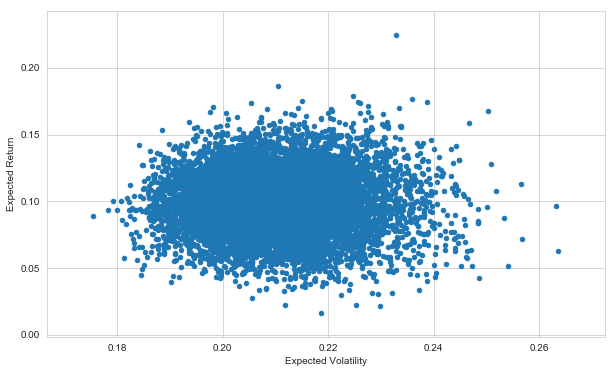

In [320]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [334]:
# For Testing purposes
index = 7035
#index = len(pflio_scenarios)-1
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
print(index)
print(np.sum(pflio_wei[index]))
pflio_wei2 = pflio_wei[index]



ideal_portfolio = pd.DataFrame({'Weights': pflio_wei2})
ideal_portfolio = pd.concat([symbols_df, ideal_portfolio], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Weights', ascending=False)
ideal_portfolio.to_csv('ideal_weights.csv', index=False)
ideal_portfolio

7035
1.0


,Symbol,Weights
8,ARKW,0.378830
0,AAPL,0.376012
4,XOM,0.076186
3,JD,0.061081
1,BRK.B,0.043070
7,PFE,0.026416
2,BABA,0.019752
6,DAL,0.014828
9,AGNC,0.001952
5,LUV,0.001873


## Data Visualization

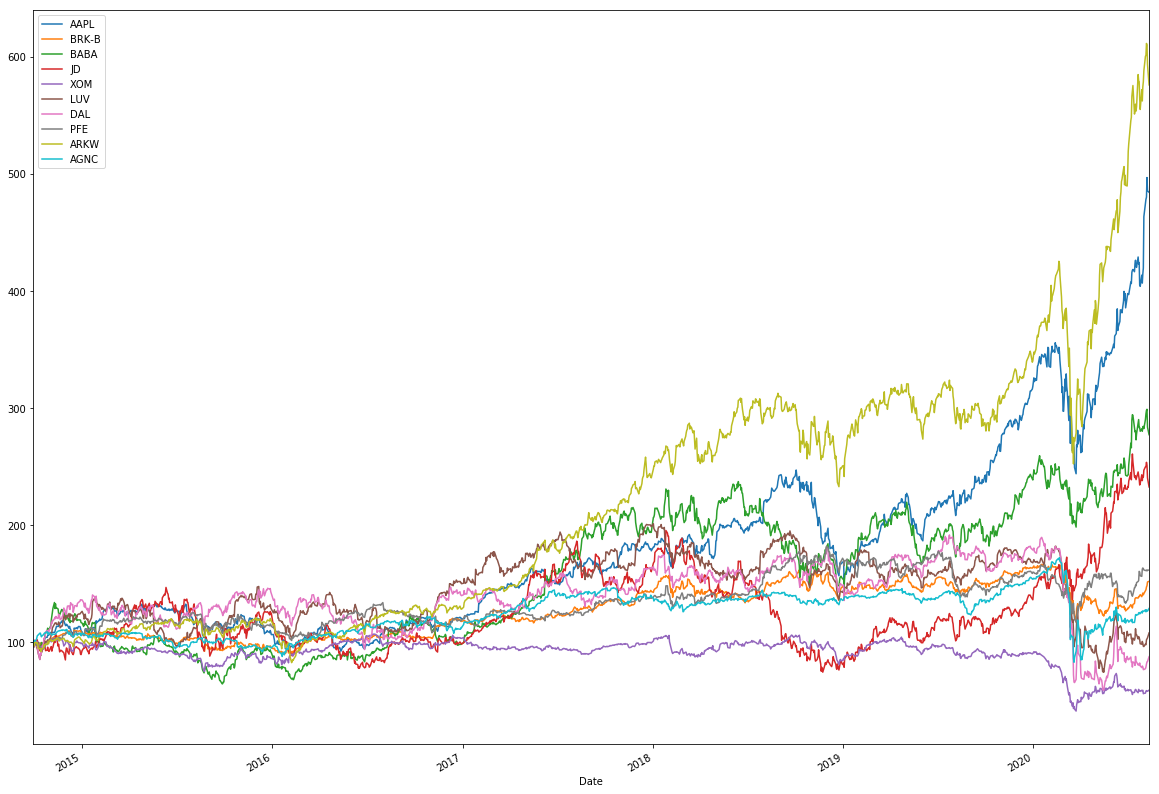

In [31]:
(my_data/my_data.iloc[0]*100).plot(figsize=(20,15))

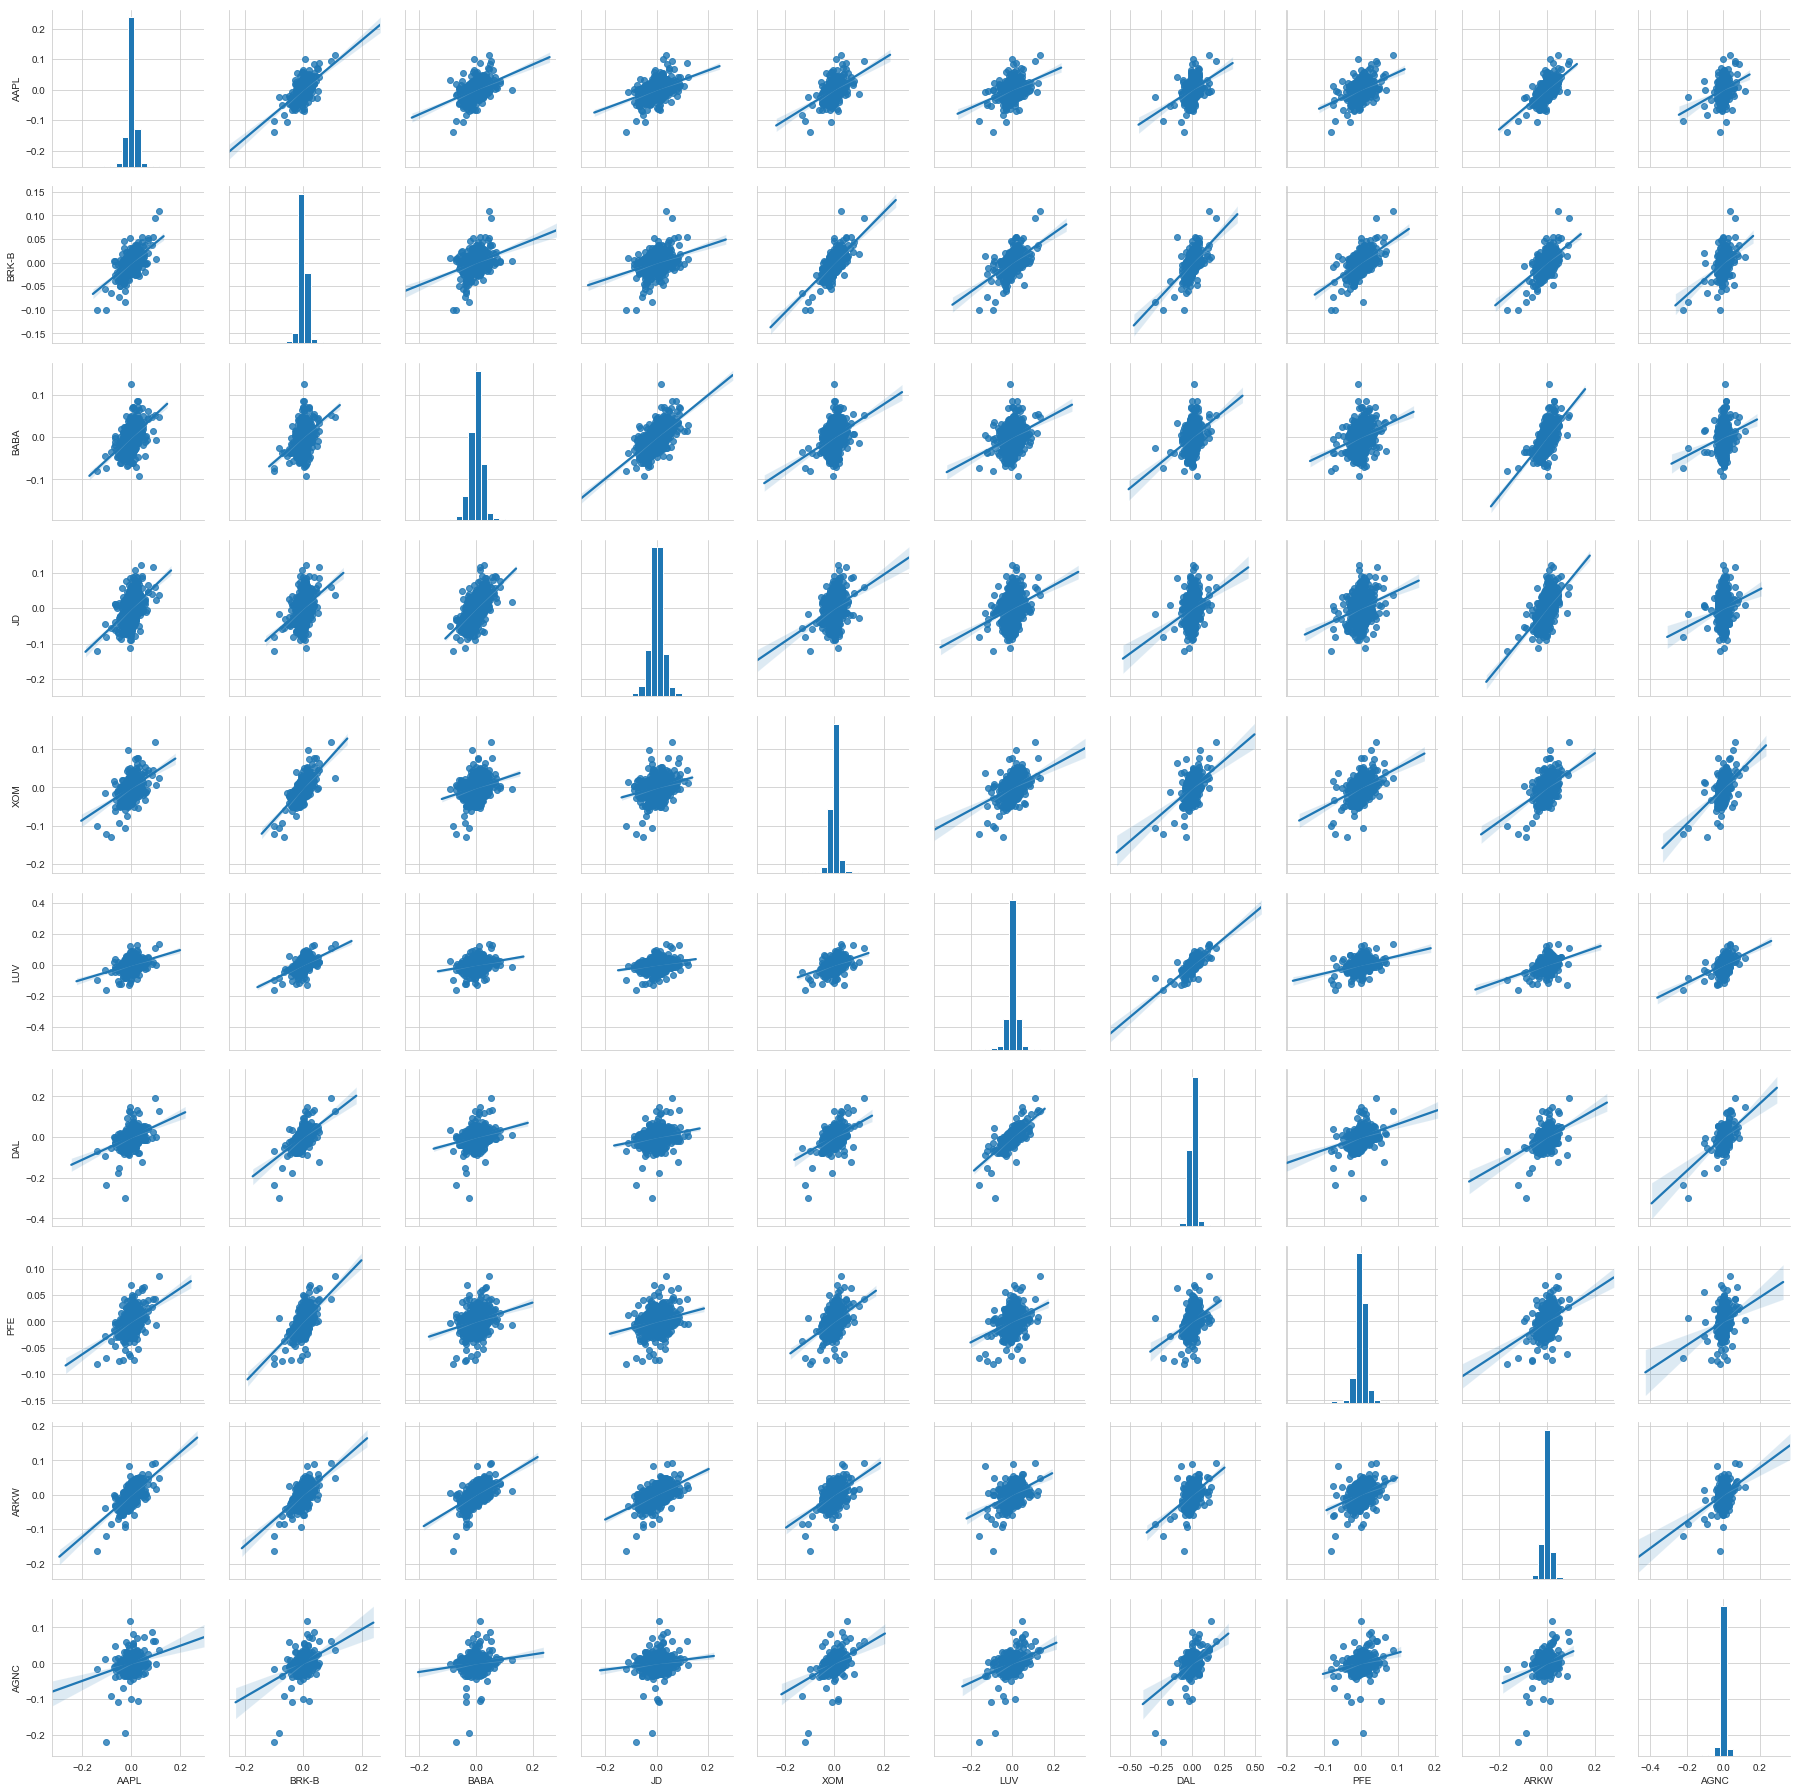

In [336]:
sns.set_style('whitegrid')
regression = sns.pairplot(sec_returns[1:], kind="reg")
regression

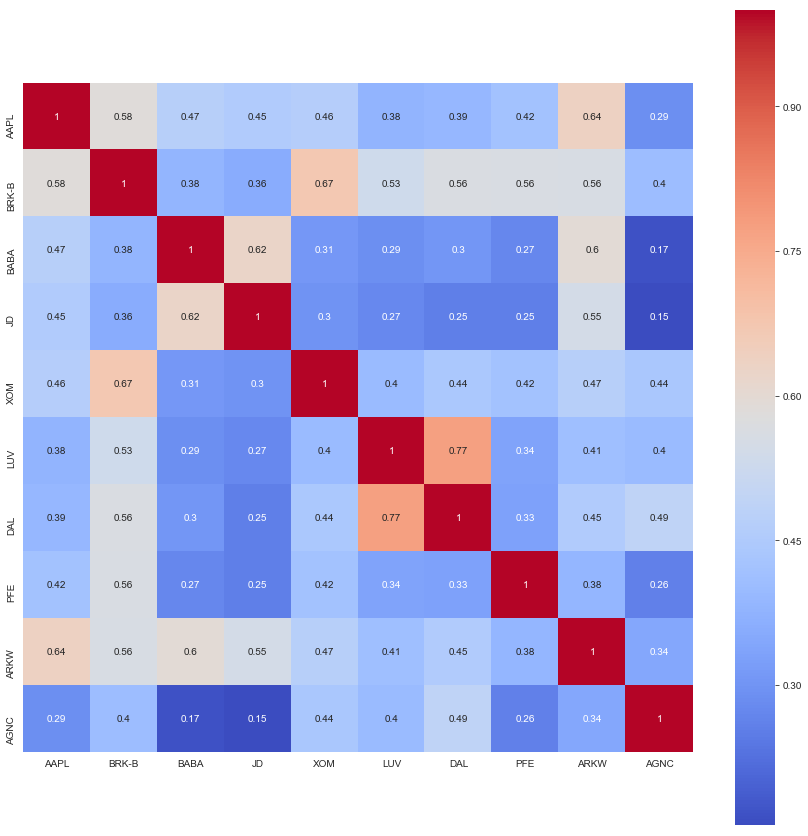

In [335]:
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap
